In [6]:
import torch
import ot
import matplotlib.pyplot as plt

In [186]:
def wasserstein_distance(a, b, wa, wb):

    W_dist = ot.wasserstein_1d(a, b, wa, wb, p = 1)

    return W_dist

In [210]:
def wasserstein_distance2(a, b, wa, wb):

    W_dist = ot.emd2_1d(a.double(), b.double(), wa.double(), wb.double(), metric = 'euclidean')

    return W_dist

In [212]:
def wasserstein_dist_old(a, b, wa, wb):
    
    M = ot.dist(a.reshape(a.size(0),1), b.reshape(b.size(0),1), 'euclidean') #euclidean->W_1, sqeuclidean->W_2
    T = ot.emd(wa, wb, M)

    # W = torch.sqrt(torch.sum(T*M))
    W = torch.sum(T*M)

    return W

tensor(34.4767, dtype=torch.float64)
tensor(34.4767, dtype=torch.float64)
tensor(34.4767, dtype=torch.float64)


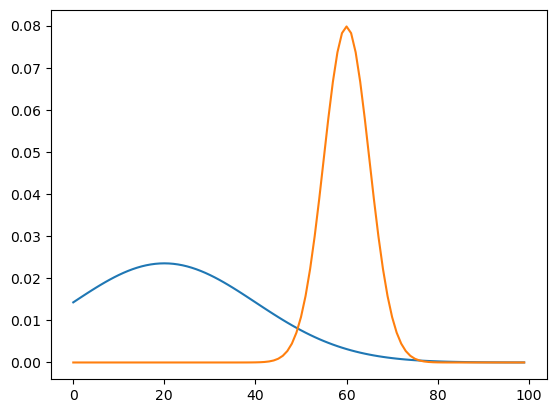

In [213]:
n = 100

x = torch.arange(n)

a =  torch.tensor(ot.datasets.make_1D_gauss(n, m=20, s=20))
b =  torch.tensor(ot.datasets.make_1D_gauss(n, m=60, s=5)) 

plt.plot(x, a)
plt.plot(x, b)

print(wasserstein_dist_old(x, x, a, b))
print(wasserstein_distance(x, x, a, b))
print(wasserstein_distance2(x, x, a, b))